In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# importing the data set

In [2]:
# importing the dataset
data=pd.read_csv("D:/Datasets/mail_data.csv")

# data preprocessing


In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
data['Message'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [9]:
data.loc[data['Category']=='spam','Category',]=0
data.loc[data['Category']=='ham','Category',]=1

In [10]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english',lowercase=True)
x=vectorizer.fit_transform(data['Message'])

In [12]:
x.shape

(5572, 8440)

In [13]:
y=data['Category']

In [14]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [15]:
y=y.astype('int')
x=x.astype('int')

# Splitting the data set into testing and training set

In [16]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(3900, 8440)

In [18]:
X_test.shape

(1672, 8440)

# model fitting

# naive bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB()

In [20]:
model1.score(X_test,y_test)

0.9796650717703349

In [21]:
y_predicted=model1.predict(X_test)
y_predicted

#Using model1.predict(x_test) helps us understand how accurately our trained machine learning model (model1) predicts outcomes for new data (x_test)
,# providing valuable insights into its performance.#


array([1, 1, 1, ..., 1, 0, 1])


# confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_predicted)
cm1

array([[ 212,   12],
       [  22, 1426]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

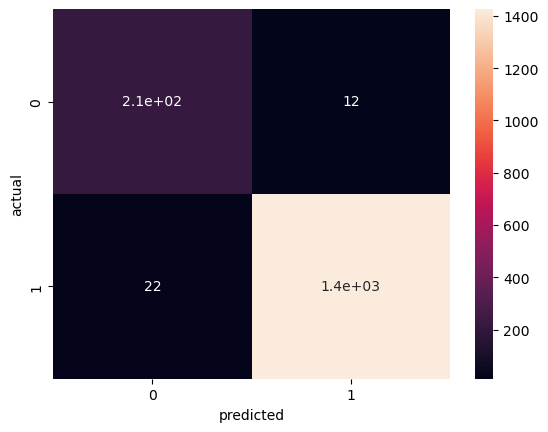

In [23]:
# vizualizing confusion matrix
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')


# j48

# we useDecisionTreeClassifier from scikit-learn for J48, since scikit-learn does not have a direct implementation of J48 but the DecisionTreeClassifier with certain parameters can emulate J48.

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree (J48 equivalent)
j48_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
j48_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
j48_model.score(X_test,y_test)

0.9730861244019139

In [26]:
y_predicted2=j48_model.predict(X_test)
y_predicted2

array([1, 1, 1, ..., 1, 0, 1])

In [27]:
#confusion matrix
cm2=confusion_matrix(y_test,y_predicted2)
cm2

array([[ 189,   35],
       [  10, 1438]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

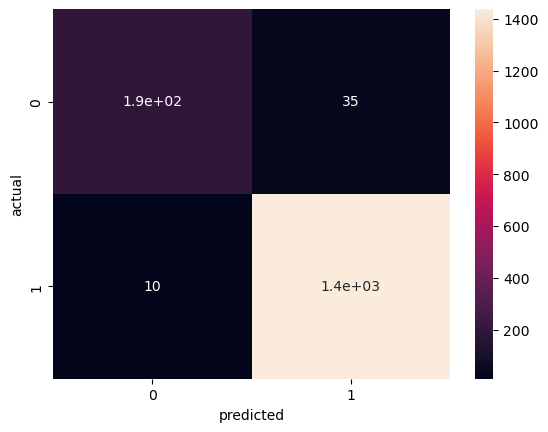

In [28]:
# vizualizing confusion matrix
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

# here we see that the accuracy of naive bayes  multinomial is 0.9796650717703349 and the accuracy of j48 is 0.9730861244019139  ,the accuracy of  naive bayes multinomial is little better then j48 so we select multinomial

In [29]:
# now chechking the actual model accuracy using kfold cross validation
from sklearn.model_selection import cross_val_score
# 5 fold cross validation
scores=cross_val_score(model1,X_train,y_train,cv=5)

#fold wise accuracy
print("fold,wise accuracy",scores)
#mean accuracy
print("mean_accuracy",scores.mean())


fold,wise accuracy [0.97692308 0.97820513 0.98333333 0.98333333 0.98076923]
mean_accuracy 0.9805128205128204


In [30]:
input_your_mail=["Congratulations! You've been selected as a winner of a $1,000,000 prize! Click here to claim your reward now!"]
# to convert the input text 
input_data_features=vectorizer.transform(input_your_mail)
predictions=model1.predict(input_data_features)
print(predictions)

if (predictions[0]== 1):
    print( 'ham mail')
else:
        print('Be carefull,this is a spam mail')


[0]
Be carefull,this is a spam mail


In [31]:
# now saving the naieve byes model
import joblib

#saving the count vectorizer
joblib.dump(vectorizer,'vectorizer.pkl')


['vectorizer.pkl']

In [32]:
# Model ko save karo
joblib.dump(model1, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']